# Exploring income data using Python 

### Cleaning, slicing and graphing data with pandas and matplotlib packages 

#### Data source: Scottish Government Local Level Average Household Income Estimates 2014

In [1]:
import pandas as pd

In [2]:
import glob

In [4]:
import matplotlib.pyplot as plt

In [65]:
# read in csv data

df = pd.read_csv(r"C:\Users\johan\incomedata\Local Level Average Household Income Estimates 2014.csv")


In [66]:
df.head()

,FeatureCode,DateCode,Measurement,Units,Value
0,S01008830,2014,Median,Pounds (GBP),659.91
1,S01008831,2014,Median,Pounds (GBP),632.69
2,S01008828,2014,Median,Pounds (GBP),649.25
3,S01008829,2014,Median,Pounds (GBP),673.90
4,S01008833,2014,Median,Pounds (GBP),599.62


In [8]:
df.shape

(13940, 5)

In [68]:
df.describe()

,DateCode,Value
count,13940.0,13940.000000
mean,2014.0,636.923443
std,0.0,167.126590
min,2014.0,280.000000
25%,2014.0,517.517500
50%,2014.0,605.970000
75%,2014.0,728.775000
max,2014.0,1559.400000


In [11]:
df['Measurement'].value_counts()

Mean      6970
Median    6970
Name: Measurement, dtype: int64

In [21]:
# slice the columns we need

df2 = df.iloc[:,0:5]

df2

,FeatureCode,DateCode,Measurement,Units,Value
0,S01008830,2014,Median,Pounds (GBP),659.91
1,S01008831,2014,Median,Pounds (GBP),632.69
2,S01008828,2014,Median,Pounds (GBP),649.25
3,S01008829,2014,Median,Pounds (GBP),673.90
4,S01008833,2014,Median,Pounds (GBP),599.62
...,...,...,...,...,...
13935,S01011155,2014,Mean,Pounds (GBP),558.75
13936,S01011153,2014,Mean,Pounds (GBP),585.44
13937,S01011157,2014,Mean,Pounds (GBP),658.94
13938,S01011158,2014,Mean,Pounds (GBP),795.17


In [25]:
# we only need three columns

data = df[['FeatureCode', 'Measurement', 'Value']]

data

,FeatureCode,Measurement,Value
0,S01008830,Median,659.91
1,S01008831,Median,632.69
2,S01008828,Median,649.25
3,S01008829,Median,673.90
4,S01008833,Median,599.62
...,...,...,...
13935,S01011155,Mean,558.75
13936,S01011153,Mean,585.44
13937,S01011157,Mean,658.94
13938,S01011158,Mean,795.17


In [26]:
# check for missings

data.isnull().sum()

FeatureCode    0
Measurement    0
Value          0
dtype: int64

In [31]:
# filter by measurement - we want median incomes

data.query('Measurement == "Median"', inplace=True)
data

<ipython-input-31-a19b4c360864>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.query('Measurement == "Median"', inplace=True)


,FeatureCode,Measurement,Value
0,S01008830,Median,659.91
1,S01008831,Median,632.69
2,S01008828,Median,649.25
3,S01008829,Median,673.90
4,S01008833,Median,599.62
...,...,...,...
6965,S01011155,Median,450.99
6966,S01011153,Median,484.53
6967,S01011157,Median,568.96
6968,S01011158,Median,653.14


In [32]:
median_income =  data['Value']

In [36]:
# what is the range of median income in local areas?

median_income.describe()

count    6970.000000
mean      589.206674
std       155.801329
min       280.000000
25%       479.375000
50%       554.565000
75%       670.425000
max      1430.600000
Name: Value, dtype: float64

#### Graphs

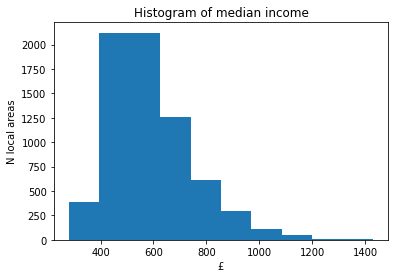

In [35]:
# histogram

fig,ax = plt.subplots(1,1)
ax.hist(median_income)
ax.set_title('Histogram of median income')
ax.set_xlabel('£')
ax.set_ylabel('N local areas')
plt.show()

<AxesSubplot:>

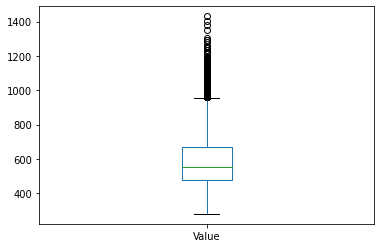

In [37]:
# boxplot - simple code

median_income.plot.box()

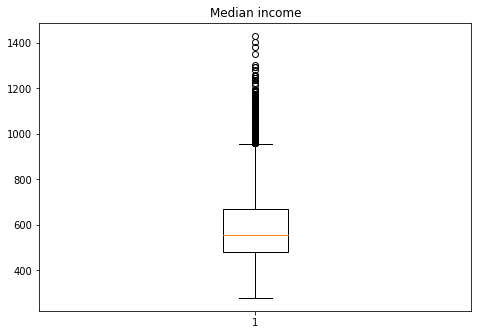

In [57]:
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(median_income)
ax.set_title('Median income')
plt.show()

In [69]:
# want to organise mean income to its own column for same area code

# check values of area code - duplicates

df['FeatureCode'].value_counts()

S01012599    2
S01008305    2
S01010130    2
S01012391    2
S01007123    2
            ..
S01009452    2
S01007403    2
S01010270    2
S01008064    2
S01009088    2
Name: FeatureCode, Length: 6970, dtype: int64

In [76]:
# to wide format

df_select = df[['FeatureCode', 'Measurement', 'Value' ]]
print(df_select.shape)

(13940, 3)


In [88]:
table = pd.pivot_table(df_select, values = 'Value',
               index=['FeatureCode'],
               columns = 'Measurement')

table

Measurement,Mean,Median
FeatureCode,,
S01006506,834.64,707.34
S01006507,785.52,675.01
S01006508,845.28,733.30
S01006509,755.40,647.07
S01006510,799.42,660.70
...,...,...
S01013477,563.41,460.60
S01013478,750.16,661.19
S01013479,519.55,418.60


In [98]:
# do we still have duplicate area codes?


table.sort_values(by='FeatureCode', ascending=True)

Measurement,Mean,Median
FeatureCode,,
S01006506,834.64,707.34
S01006507,785.52,675.01
S01006508,845.28,733.30
S01006509,755.40,647.07
S01006510,799.42,660.70
...,...,...
S01013477,563.41,460.60
S01013478,750.16,661.19
S01013479,519.55,418.60


#### Now let's plot both mean and median


<AxesSubplot:>

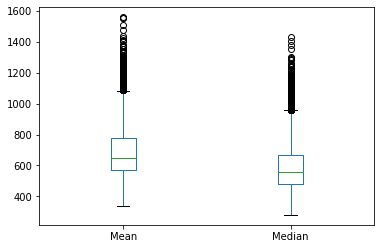

In [100]:
##how to plot both mean and median
df = pd.DataFrame(table, columns=['Mean', 'Median'])
df.plot.box()


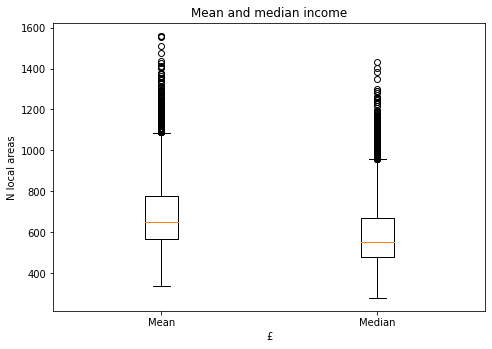

In [118]:
# Multiple box plots on one Axes
fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
bp = ax.boxplot(table)
ax.set_title('Mean and median income')
ax.set_xlabel('£')
ax.set_ylabel('N local areas')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Mean', 'Median'])
plt.show()
